In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from astropy.io import ascii
from astropy.io import fits as pf
from math import log
import emcee
import corner

-17410.7803616
0.0
-17410.7803616


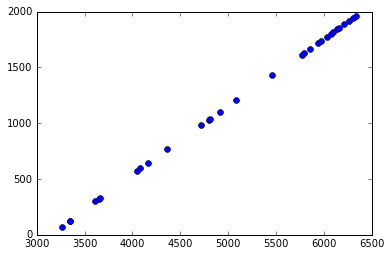

In [14]:
datadir = 'Data'
infile = '%s/wavecal.txt' % datadir
data = ascii.read(infile,guess=False,format='commented_header')
x = data['wavelength'].data
y = data['x_postion'].data
yerr = 0.4

plt.plot(x,y,'bo')
plt.errorbar(x,y,yerr,fmt='none')
#plt.ylim(-0.5,3)

#initial parameters from previous HW
pars = [-2078.907878,0.685415,-0.000008,0]


def lnlikelihood(pars, x, y, yerr):
    y_model = pars[0] + pars[1]*x + pars[2]*x**2 + pars[3]*x**3
    lnl = -(y -y_model)**2/yerr**2
    return lnl.sum()

def lnprior(pars):
    if -3000. < pars[0] < -2000. and -5. < pars[1] < 5. and -5. < pars[2] < 5. and -5. < pars[3] < 5.:
        return 0.0 # Since log(1) = 0
    else:
        return -np.inf
    
def lnprob(pars, x, y, yerr):
    lp = lnprior(pars)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlikelihood(pars, x, y, yerr)

print lnlikelihood(pars,x,y,yerr)
print lnprior(pars)
print lnprob(pars,x,y,yerr)

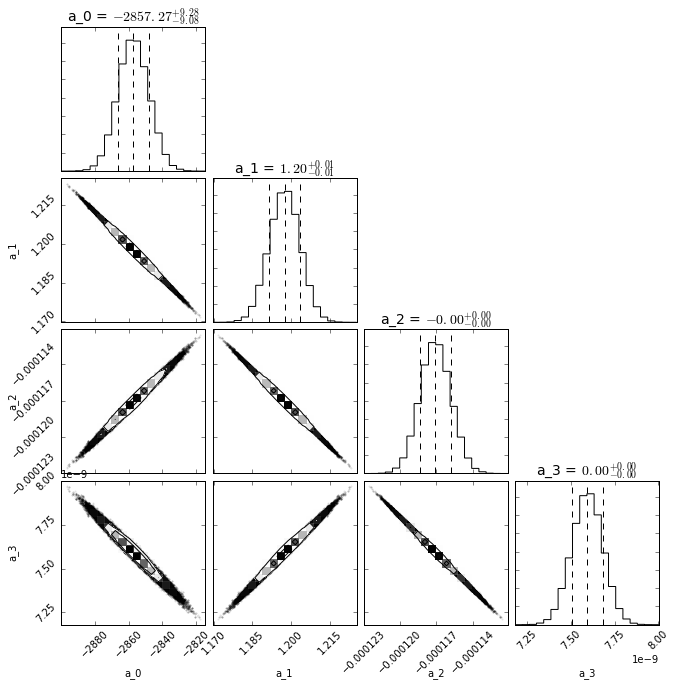

In [19]:
nwalkers = 200
ndims = 4


sampler = emcee.EnsembleSampler(nwalkers,ndims,lnprob,args=(x,y,yerr))


a0_0 = 20.*np.random.random(nwalkers) - 2078.
a1_0 = np.random.random(nwalkers)
a2_0 = np.random.random(nwalkers)
a3_0 = np.random.random(nwalkers)
p0 = np.array([a0_0,a1_0,a2_0,a3_0]).T # makes two-column array

nburn = 500
pos, prob, state = sampler.run_mcmc(p0, nburn)

sampler.reset()
niter = 2000
mcmc = sampler.run_mcmc(pos, niter, rstate0=state)




#corner plot

samples = sampler.chain.reshape((-1,ndims))
#plt.figure(figsize=(9,9))
fig = corner.corner(samples,labels=['a_0','a_1','a_2','a_3'],quantiles=[0.16, 0.5, 0.84],show_titles=True,title_kwargs={"fontsize": 14})





a0 = -2857.20.
  68 percent CL: -2866.31 - -2848.10



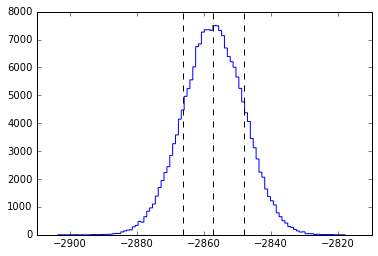


a1 =   1.20.
  68 percent CL:   1.19 -   1.20



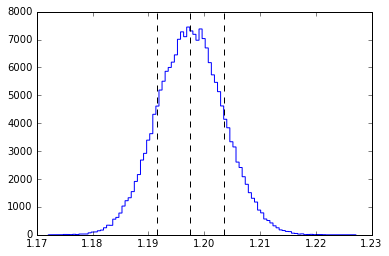


a2 = -1.17e-04.
  68 percent CL: -1.18e-04 - -1.16e-04



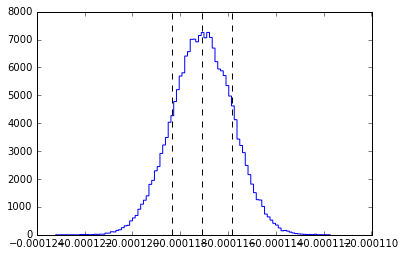


a3 = 7.59e-09.
  68 percent CL: 7.51e-09 - 7.68e-09



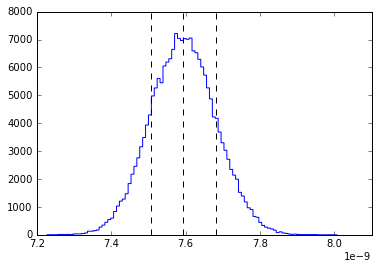

In [18]:
a0s = sampler.flatchain[:,0]
a1s = sampler.flatchain[:,1]
a2s = sampler.flatchain[:,2]
a3s = sampler.flatchain[:,3]



""" Estimate the 68% range, as well as the median point """
tmp = plt.hist(a0s,bins=100,histtype='step')
a0s.sort()
a0m = a0s[int(0.16 * a0s.size)]
a0p = a0s[int(0.84 * a0s.size)]
a0med = a0s[int(0.5 * a0s.size)]
plt.axvline(a0m,color='k',linestyle='dashed')
plt.axvline(a0p,color='k',linestyle='dashed')
plt.axvline(a0med,color='k',linestyle='dashed')
print ''
print 'a0 = %6.2f.' % a0med
print '  68 percent CL: %6.2f - %6.2f' % (a0m,a0p)
print ''
plt.show()

""" Estimate the 68% range, as well as the median point """
tmp = plt.hist(a1s,bins=100,histtype='step')
a1s.sort()
a1m = a1s[int(0.16 * a1s.size)]
a1p = a1s[int(0.84 * a1s.size)]
a1med = a1s[int(0.5 * a1s.size)]
plt.axvline(a1m,color='k',linestyle='dashed')
plt.axvline(a1p,color='k',linestyle='dashed')
plt.axvline(a1med,color='k',linestyle='dashed')
print ''
print 'a1 = %6.2f.' % a1med
print '  68 percent CL: %6.2f - %6.2f' % (a1m,a1p)
print ''
plt.show()

""" Estimate the 68% range, as well as the median point """
tmp = plt.hist(a2s,bins=100,histtype='step')
a2s.sort()
a2m = a2s[int(0.16 * a2s.size)]
a2p = a2s[int(0.84 * a2s.size)]
a2med = a2s[int(0.5 * a2s.size)]
plt.axvline(a2m,color='k',linestyle='dashed')
plt.axvline(a2p,color='k',linestyle='dashed')
plt.axvline(a2med,color='k',linestyle='dashed')
print ''
print 'a2 = %6.2e.' % a2med
print '  68 percent CL: %6.2e - %6.2e' % (a2m,a2p)
print ''
plt.show()

""" Estimate the 68% range, as well as the median point """
tmp = plt.hist(a3s,bins=100,histtype='step')
a3s.sort()
a3m = float(a3s[int(0.16 * a3s.size)])
a3p = float(a3s[int(0.84 * a3s.size)])
a3med = float(a3s[int(0.5 * a3s.size)])
plt.axvline(a3m,color='k',linestyle='dashed')
plt.axvline(a3p,color='k',linestyle='dashed')
plt.axvline(a3med,color='k',linestyle='dashed')
print ''
print 'a3 = %6.2e.' % a3med
print '  68 percent CL: %6.2e - %6.2e' % (a3m,a3p)
print ''
plt.show()


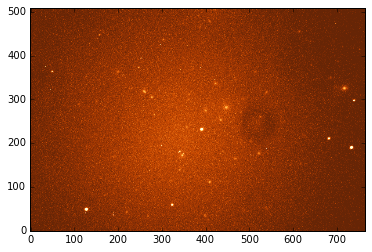

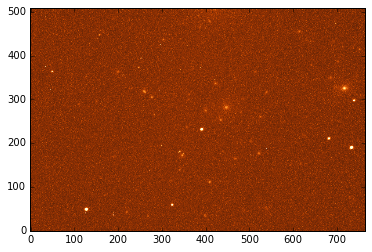

In [6]:
hdu1 = pf.open('%s/%s'%(datadir,'Dark_T10_120s_1.fits'))
hdu2 = pf.open('%s/%s'%(datadir,'Dark_T10_120s_2.fits'))
hdu3 = pf.open('%s/%s'%(datadir,'Dark_T10_120s_3.fits'))

hdus = pf.open('%s/%s'%(datadir,'NGC4874_T10_2010_V_1.fits'))

dark1 = hdu1[0].data
dark2 = hdu2[0].data
dark3 = hdu3[0].data

sci = hdus[0].data

darklist = np.array([dark1,dark2,dark3])
darkarray = np.empty([3,510,765])
darkarray[:,:,:] = darklist[:,:,:]
darkmed = np.median(darkarray,axis=0)

sci_darkcor = sci - darkmed
tmpdat = sci_darkcor.copy().flatten()

def sigclip(data):
    mean = np.mean(data)
    std = np.std(data)
    
    mask = abs(data - mean) < 3*std
    datacl = data[mask]
    
    return datacl,len(data),len(datacl)

clipped = sigclip(tmpdat)

while clipped[1] != clipped[2]:
    clipped = sigclip(clipped[0])
    
#print clipped
mu_cl = np.mean(clipped[0])
sig_cl = np.std(clipped[0])

vmin = mu_cl - sig_cl
vmax = mu_cl + 10*sig_cl
plt.imshow(sci_darkcor,origin='lower',vmin=vmin,vmax=vmax,cmap=cm.YlOrBr_r)
plt.show()



hdu1 = pf.open('%s/%s'%(datadir,'Flat_T10_V_1.fits'))
hdu2 = pf.open('%s/%s'%(datadir,'Flat_T10_V_2.fits'))
hdu3 = pf.open('%s/%s'%(datadir,'Flat_T10_V_3.fits'))
hdu4 = pf.open('%s/%s'%(datadir,'Flat_T10_V_4.fits'))
hdu5 = pf.open('%s/%s'%(datadir,'Flat_T10_V_5.fits'))

f1 = hdu1[0].data
f2 = hdu2[0].data
f3 = hdu3[0].data
f4 = hdu4[0].data
f5 = hdu5[0].data

flats = [f1,f2,f3,f4,f5]
newflats = []

for i in flats:
    i = i/np.median(i)
    newflats.append(i)
    
newflats = np.array(newflats)    
masterflat = sum(newflats)/5

sci_flatf = sci_darkcor/masterflat

plt.imshow(sci_flatf,origin='lower',vmin=vmin,vmax=vmax,cmap=cm.YlOrBr_r)
plt.show()